# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [161]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
import statsmodels.api as sm

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




In [40]:
#Exploracion de datos nulos


# Resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

#exploracion

frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,id,569,0
1,diagnosis,2,0
2,radius_mean,456,0
3,texture_mean,479,0
4,perimeter_mean,522,0
5,area_mean,539,0
6,smoothness_mean,474,0
7,compactness_mean,537,0
8,concavity_mean,537,0
9,concave points_mean,542,0


In [36]:
#Normalizacion

scaler = StandardScaler()
scaler.fit(df.drop(["diagnosis","id"],axis=1))
df_scaled = pd.DataFrame(scaler.transform(df.drop(["diagnosis","id"],axis=1)),columns = df.drop(["diagnosis","id"],axis=1).columns)
df_scaled["diagnosis"] = df["diagnosis"]

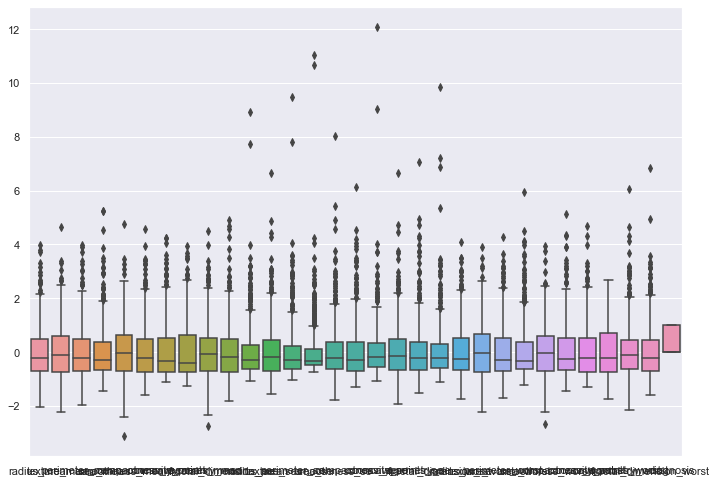

In [35]:
#se revisan los datos normalizados
sns.boxplot(data = df_scaled)
plt.show()

In [31]:
#debido a la cantidad de dimensiones se usa tsne

scaler = StandardScaler()

X = df_scaled.drop(columns="diagnosis")
y = df_scaled["diagnosis"]
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne["diagnosis"] = y

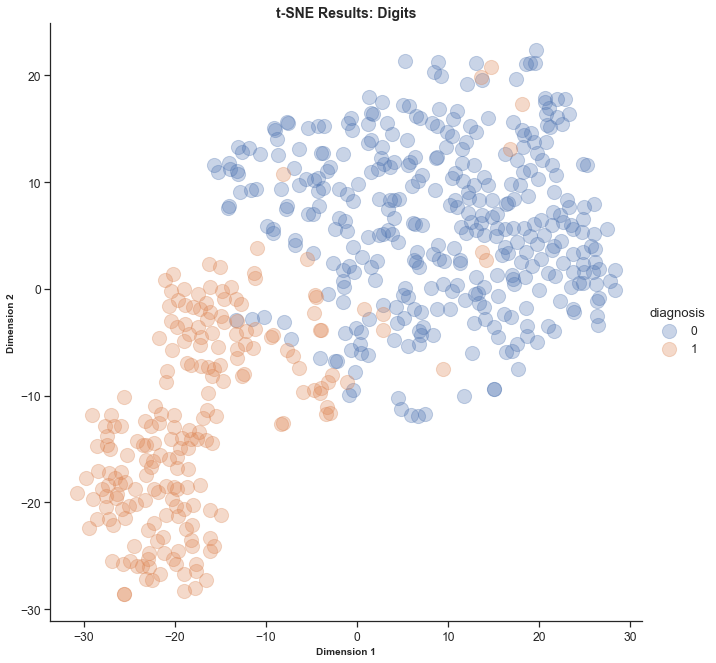

In [32]:
# Plot  tsne
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue="diagnosis",
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [121]:
#Clasificacion


#seaparacion de datos
x_train, x_eval, y_train, y_eval = train_test_split(df_tsne.drop(["diagnosis"],axis=1), df_tsne["diagnosis"], test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=666)

In [122]:
#optim. de hiperparametros de LogReg

model = LogisticRegression()

#rango parametros
rango_penalty = ["l1", "l2", "elasticnet", "none"]
param_grid = dict(penalty=rango_penalty)

# aplicar grid search

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)
mejor_logreg = gs.best_estimator_

# imprimir resultados

print(gs.best_score_)
print(gs.best_params_)


0.9376156978896704
{'penalty': 'l2'}


C:\Users\jak_n\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [      nan 0.9376157       nan 0.9376157]
  warnings.warn(


In [123]:
#optim. de hiperparametros de SVC

model = SVC()

#rango parametros
rango_gamma=["scale","auto"]
rango_C=np.array( [1,2,3,4,5,6,7,8,9,10,20,30,40,50])
param_grid = dict(gamma=rango_gamma,C=rango_C)

# aplicar grid search

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)
mejor_svc = gs.best_estimator_

# imprimir resultados

print(gs.best_score_)
print(gs.best_params_)

0.9402813772676787
{'C': 1, 'gamma': 'scale'}


In [126]:
#optim. de hiperparametros de RandFor
model = RandomForestClassifier()

# rango de parametros
rango_criterion = ["gini","entropy"]
rango_max_depth = np.array( [4,5,6,7,8,9,10,11,12,15])
rango_n_est = np.array( [4,5,6,7,8,9,10,11,12,15,20,30])
rango_max_feat = np.array( [1,2,3,4])
param_grid = dict(criterion=rango_criterion, max_depth=rango_max_depth,n_estimators=rango_n_est,max_features=rango_max_feat)


# aplicar grid search

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(x_train, y_train)
mejor_randfor = gs.best_estimator_

# imprimir resultados

print(gs.best_score_)
print(gs.best_params_)

0.9457978526471678
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 1, 'n_estimators': 12}


C:\Users\jak_n\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.94576083 0.93217327 0.92669382 0.9376157  0.9376157  0.92950759
 0.9403184  0.93221029 0.93217327 0.9376157  0.9376157  0.934913
 0.93483895 0.93213625 0.9403184  0.9376157  0.934913   0.9376157
 0.9376157  0.934913   0.9376157  0.9430211  0.9430211  0.9430211
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.92399111 0.93757867 0.93487597 0.94572381 0.92947057 0.92673084
 0.9376157  0.93213625 0.9403184  0.9376157  0.93221029 0.9376157
 0.92673084 0.934913   0.9403184  0.92947057 0.92680489 0.93221029
 0.934913   0.93221029 0.92943354 0.94035542 0.93221029 0.9376157
        nan        nan        nan        nan        nan    

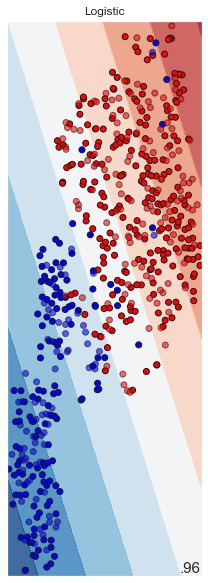

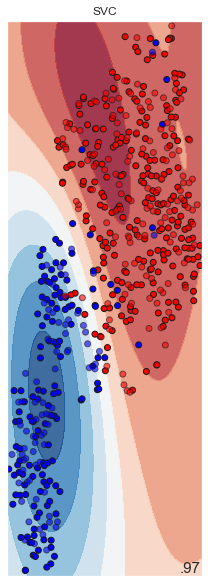

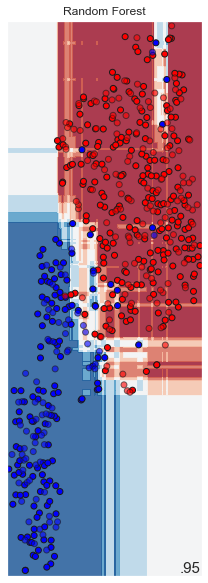

In [142]:
#metodos a usar
classifiers = [
    mejor_logreg,
    mejor_svc,
    mejor_randfor,
] 

names = [
    "Logistic",
    "SVC",
    "Random Forest"
]


#Cota de los datos
x_min, x_max = df_tsne.iloc[:, 0].min() - .5, df_tsne.iloc[:, 0].max() + .5
y_min, y_max = df_tsne.iloc[:, 1].min() - .5, df_tsne.iloc[:, 1].max() + .5


# Tamaño de malla
h = .02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#colores
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

#iterar modelos y graficar
for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, 1)
        clf.fit(x_train, y_train)
        score = clf.score(x_eval, y_eval)

        #  Plot de region de desición
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()],)
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(x_eval.iloc[:, 0], x_eval.iloc[:, 1], c=y_eval, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

        plt.tight_layout()
        plt.show()

In [173]:
# metricas 


# juntar informacion
list_models = list(zip(names,classifiers))
list_dataset = list(zip(names,[df_tsne]))

frames = []

#iterar y obtener metricas
for x in list_models:
    name_model = x[0]
    classifier = x[1]
    
    #metricas
    y_pred = classifier.predict(x_eval)
    print(name_model)
    print(classification_report(y_eval, y_pred))
    

Logistic
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       127
           1       0.95      0.96      0.95        73

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

SVC
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.97      0.96      0.97        73

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Random Forest
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       127
           1       0.94      0.93      0.94        73

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95    

Se concluye que el modelo SVC tiene mejor capacidad predictiva